<a href="https://colab.research.google.com/github/JamalMorales/Artificial-intelligence/blob/main/Assignments/AF4_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 4.- Supervised learning model: Decision tree.**

Name: Jamal Morales Sánchez ID: 2064497 Hour: N2-002

Name: Abigail Montserrat Nieto Solís ID: 2059067 Hour: N2-002

Name: Evelyn Rubí Martinez Ruíz ID: 2071292 Hour: N2-002

Name: Carlos Ernesto Martinez ID: 1975221 Hour: N2-002

Name: Gabriela Mariana Rangel Carrillo ID: 2006071 Hour: N2-002

# **1. Load libraries**
Import the necessary libraries for data handling, machine learning, and visualization. These tools will be used to build and evaluate the classification model.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import load_breast_cancer

# **2. Loading & Reading Data**
Load the breast cancer dataset from scikit-learn and organize it into a DataFrame for features (X) and a Series for labels (Y).

In [2]:
cancer = load_breast_cancer()
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
Y = pd.Series(cancer.target)

# **3. Data preprocessing**
Split the dataset into training and testing sets. This allows the model to learn from one portion and be evaluated on unseen data.

In [3]:
train_data, test_data, train_labels, test_labels = train_test_split(X, Y, test_size=0.2, random_state=42)


# **4. Model selection and training.**

Create a decision tree classifier and train it using the training data. The model learns patterns to distinguish between classes.

In [4]:
model = DecisionTreeClassifier()
model.fit(train_data, train_labels)
predictions = model.predict(test_data)

# **5. Model testing**

Evaluate the model’s performance using accuracy and a classification report. Then, visualize the decision tree to understand how the model makes decisions.

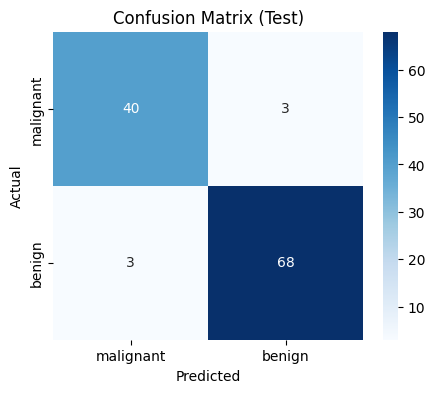

In [5]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict with your model
y_pred = model.predict(test_data)

# Compute confusion matrix
conf_matrix = confusion_matrix(test_labels, y_pred)

# Plot confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['malignant', 'benign'],
            yticklabels=['malignant', 'benign'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Test)")
plt.show()


In [6]:
# Prediction 1
print(y_pred[3])         # Predicted label for test sample at index 1
print(test_labels.iloc[3])  # Actual label for test sample at index 1

# Prediction 2
print(y_pred[10])
print(test_labels.iloc[10])

# Prediction 3
print(y_pred[-1])        # Last prediction in the test set
print(test_labels.iloc[-1])


1
1
1
1
0
0


In [7]:
accuracy = accuracy_score(test_labels,predictions)
print(f"Accuracy: {accuracy:.3f}")
print("\nClassification Report:")
print(classification_report(test_labels, predictions))


Accuracy: 0.947

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



# **6. Decision tree visualization**

Print the final model to visualize, this step uses plot_tree() to visually represent the trained decision tree. It helps interpret how the model makes decisions based on feature splits and class outcomes. The tree is printed using matplotlib, showing nodes, thresholds, and class labels.

In [8]:
plt.figure(figsize=(30,20), dpi=300)
plot_tree(model,
          feature_names=X.columns,
          class_names=np.unique(Y).astype(str),
          filled=True,
          fontsize=12)
plt.tight_layout()
plt.show()